# Python Lab 05: Fifa '19 and PCA

## Francesco Della Santa, Computational Linear Algebra for Large Scale Problems, Politecnico di Torino

In this laboratory we apply the PCA and the $k$-Means algorithm on the FIFA19 dataset (available online, e.g., here: https://www.kaggle.com/karangadiya/fifa19).

The version presented here is cleaned from NaNs.



In [24]:
# ***** ATTENTION! *****
# If you want that the "%matplotlib widget" works, you need the package ipympl (pip install ipympl)
#
#
# MATPLOTLIB INTERACTIVE VISUALIZATION. REMOVE (OR COMMENT) IF YOU NEED TO PRINT THE NOTEBOOK AS A PDF, SOMETIMES IT DOES NOT WORK WELL...
%matplotlib widget
#h
#

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D
import yaml #loading dictionary
from IPython.display import display  # to display variables in a "nice" way

try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper

# pd.options.display.max_rows = 9999
pd.options.display.max_columns = 20

## Loading and Preparing the Dataset

### Loading as DataFrame

We start loading the dataset. 

**EXERCISE:** Load and display the dataset as a pandas DataFrame following these operations:
1. Download the file *fifa19datastats.csv* from the webpage of the course;
1. Save the file into a path of subfolders (e.g., "data/Fifa19" inside your working folder where this notebook is saved);
1. Load the file as a pandas DataFrame using the *read_csv* function;

    **ATTENTION:** the values in the first column of the .csv file are the indexes!
1. Display the DataFrame.

In [5]:
# PATH TO THE fifa19datastats.csv FILE
myfifa_path = open("datasets/fifa19datastats.csv")  # <-- TODO!!

# LOADING THE DATASET AS DATAFRAME
myfifa_df = pd.read_csv(myfifa_path)  # <-- TODO!!

# DISPLAY OF THE DATAFRAME
display(myfifa_df)  # <-- TODO!!

,Index,ID,Overall,Position,GeneralPosition,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,94,RF,FW,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,20801,94,ST,FW,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,190871,92,LW,MF,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,193080,91,GK,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,192985,91,RCM,MF,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18142,18202,238813,47,CM,MF,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18143,18203,243165,47,ST,FW,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18144,18204,241638,47,ST,FW,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18145,18205,246268,47,RW,MF,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


### Cleanining the Dataset

In this case, we do not need to analyze the dataset, looking for missing and/or wrong data/information. Indeed, this dataset is already the result of a cleaning procedure.

Nonehteless, we summarize here the good practices for cleaning a dataset before applying the PCA and the $k$-Means.

#### General Suggestions for Cleaning a Dataset

1. Look for missing data
   1. count/find the rows with missing data;
   2. count/find the features (i.e., columns) with missing data;
1. Since we are going to perform clustering, **DO NOT REPLACE** the missing/wrong data with information that can be uncorrect and misleading! Unless you are almost $100\%$ sure that the values you use to replace the "corrupted" information are true and/or "truly neutral", avoid to fill the missing parts of the datasets! For a clustering task, few but good data are better than many wrong data; then, often it is sufficient to remove the rows with missing/wrong values.
   1. If the "clean" data (i.e., data without missing/wrong values) are not enough to perform a good clustering, look for those features where the missing/wrong values can be considered as a special value; For example, if in the column "Job" of a given dataset there are too many missing values, instead of removing all the corresponding rows, we can consider the missing value as the special job-category value "Unknown Job".
1. Since we are going to perform dimensionality reduction through the PCA, **DO NOT REMOVE** features (i.e., columns) from the dataset! Few exceptions can include the case of a column with almost all the values missing, etc. 

### Selecting the Features

In the dataset above, we see many columns. In particular, the features we are interested in are the skills; i.e., all the columns *after* the *GeneralPosition* column.
The skill columns describe with a value between $1$ and $99$ the level of a football player in that skill. Concerning the other columns:
1. **ID:** is the identinty number of the foorball player in the dataset;
1. **Position:** favourite position of a player in the field during a game;
1. **GeneralPosition:** favourite general position of a player in the field during a game. In particular, we identify four main general positions:
    - *Goal-Keeper* (GK);
    - *Defender* (DF);
    - *Mid-Fielder* (MF);
    - *Forward* (FW).
1. **Overall:** a value between $1$ and $99$ that describes the overall score of a player w.r.t. its general position. In particular, it is computed as a weighted mean of the most important skills associated to the player's general position.

For our scopes, we want to separate the skill features from the oter columns.

**EXERCISE:** Create a variable *Xfifa_df* and a variable *Xfifa* such that
1. *Xfifa_df* is a DataFrame obtained from *myfifa_df* keeping only the skill columns;
1. *Xfifa* is the 2D-array of data contained in *Xfifa_df*.

Then, display the DataFrame *Xfifa_df*.

In [19]:
# LIST OF COLUMN NAME SCORRESPONDING TO THE SKILLS
skill_cols = myfifa_df.columns.to_list()[5:]  # <-- TODO!!

# DATAFRAME WITH COLUMNS CORRESPONDING ONLY TO SKILLS
Xfifa_df = myfifa_df.loc[:,skill_cols]  # <-- TODO!!

# MATRIX OF DATA CONTAINED IN Xfifa_df
Xfifa = Xfifa_df.values  # <-- TODO!!

# DISPLAY THE DATAFRAME
display(Xfifa_df)  # <-- TODO!!

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18142,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18143,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18144,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18145,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


### Skill Types and Categories

The authors of FIFA '19, divide the skills into groups according to two criterions:
1. **Type:**
    1. *Physical skills:* Acceleration, SprintSpeed, Agility, Balance, Reactions, Jumping, Stamina, Strength;
    1. *Mental skills:* Positioning, Vision, Composure, Interceptions, Aggression;
    1. *Technical skills:* Finishing, LongShots, Penalties, ShotPower, Volleys, Crossing, Curve, FKAccuracy, LongPassing, ShortPassing, BallControl, Dribbling, HeadingAccuracy, Marking, SlidingTackle, StandingTackle;
    1. *Goalkeeper skills:* GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes.
1. **Category:**
    1. *Pace:* Acceleration, SprintSpeed;
    1. *Shooting:* Finishing, LongShots, Penalties, Positioning, ShotPower, Volleys;
    1. *Passing:* Crossing, Curve, FKAccuracy, LongPassing, ShortPassing, Vision;
    1. *Dribbling:* Agility, Balance, BallControl, Composure, Dribbling, Reactions;
    1. *Defending:* HeadingAccuracy, Interceptions, Marking, SlidingTackle, StandingTackle;
    1. *Power:* Aggression, Jumping, Stamina, Strength;
    1. *Goalkeeping:* GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes


**EXERCISE:** load as DataFrames the two .csv files (*skilltypes.csv* and *skillcategories.csv*) that describe these two groups. The files are available on the web page of the course and it is suggested to save them in the same folder of the file *fifa19datastats.csv*.

**EXERCISE:** Add a column to these DataFrames containing a different color for each type/category of skills; then display the result. Use the **colormap Set3** of matplotlib (cm.Set3.colors); in particular:
1. Use the first 4 colors for the types;
1. Use the colors from 5th to 11th for the categories.
*Suggestion:* use the given dictionaries.


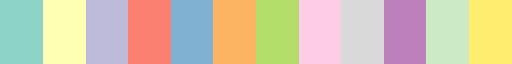

,skill,type,color
0,Acceleration,Physical,"(0.5529411764705883, 0.8274509803921568, 0.780..."
1,SprintSpeed,Physical,"(0.5529411764705883, 0.8274509803921568, 0.780..."
2,Agility,Physical,"(0.5529411764705883, 0.8274509803921568, 0.780..."
3,Balance,Physical,"(0.5529411764705883, 0.8274509803921568, 0.780..."
4,Reactions,Physical,"(0.5529411764705883, 0.8274509803921568, 0.780..."
5,Jumping,Physical,"(0.5529411764705883, 0.8274509803921568, 0.780..."
6,Stamina,Physical,"(0.5529411764705883, 0.8274509803921568, 0.780..."
7,Strength,Physical,"(0.5529411764705883, 0.8274509803921568, 0.780..."
8,Positioning,Mental,"(1.0, 1.0, 0.7019607843137254)"
9,Vision,Mental,"(1.0, 1.0, 0.7019607843137254)"


,skill,category,color
0,Acceleration,Pace,"(0.5019607843137255, 0.6941176470588235, 0.827..."
1,SprintSpeed,Pace,"(0.5019607843137255, 0.6941176470588235, 0.827..."
2,Finishing,Shooting,"(0.9921568627450981, 0.7058823529411765, 0.384..."
3,LongShots,Shooting,"(0.9921568627450981, 0.7058823529411765, 0.384..."
4,Penalties,Shooting,"(0.9921568627450981, 0.7058823529411765, 0.384..."
5,Positioning,Shooting,"(0.9921568627450981, 0.7058823529411765, 0.384..."
6,ShotPower,Shooting,"(0.9921568627450981, 0.7058823529411765, 0.384..."
7,Volleys,Shooting,"(0.9921568627450981, 0.7058823529411765, 0.384..."
8,Crossing,Passing,"(0.7019607843137254, 0.8705882352941177, 0.411..."
9,Curve,Passing,"(0.7019607843137254, 0.8705882352941177, 0.411..."


In [29]:
# SAVE THE COLORS OF Set3 AS A LIST OF 3-TUPLES "(red_value, green_value, blue_value)"
set3 = cm.Set3.colors

######### SHOWING THE COLORS OF THE CHOSEN COLORMAP #########
display(cm.Set3)
#############################################################

# LOADING THE DATASETS AS DATAFRAMES
skill_types_df = pd.read_csv("datasets/skilltypes.csv")  # <-- TODO!!
skill_cats_df = pd.read_csv("datasets/skillcategories.csv")  # <-- TODO!!

type_colors = {
    'Physical': set3[0],
    'Mental': set3[1],
    'Technical': set3[2],
    'Goalkeeper': set3[3]
}

cat_colors = {
    'Pace': set3[4],
    'Shooting': set3[5],
    'Passing': set3[6],
    'Dribbling': set3[7],
    'Defending': set3[8],
    'Power': set3[9],
    'Goalkeeping': set3[10]
}

# ADDING THE 'color' COLUMNS
skill_types_df['color'] = [type_colors[i] for i in skill_types_df["type"].values]  # <-- TODO!!
skill_cats_df['color'] = [cat_colors[i] for i  in skill_cats_df["category"].values]  # <-- TODO!!

# DISPLAY THE DATAFRAMES
display(skill_types_df)  # <-- TODO!!
display(skill_cats_df)# <-- TODO!!


## PCA

Now, we apply the PCA to our dataset. 

**ATTENTION:** obviuosly, since all the features have the same "unit measure", with a minimum value of $1$ and a maximum value of $99$, we do not need to apply any kind of preprocessing.

**EXERCISE:** In the first one of the two following cells, run the PCA on the dataset keeping *all* the Principal Components (PCs). Then, plot the cumulative explained variance (as percentage of the total variance) w.r.t. the number of principal components.

**EXERCISE:** In the second one of the two following cells, run the PCA on the dataset keeping *the first three* PCs. Then, draw a barplot with three columns representing the percentage of explained variance of the three PCs. In the title, add the value (rounded to 2 decimals) of the percentage of total expalained variance of the three PCs.



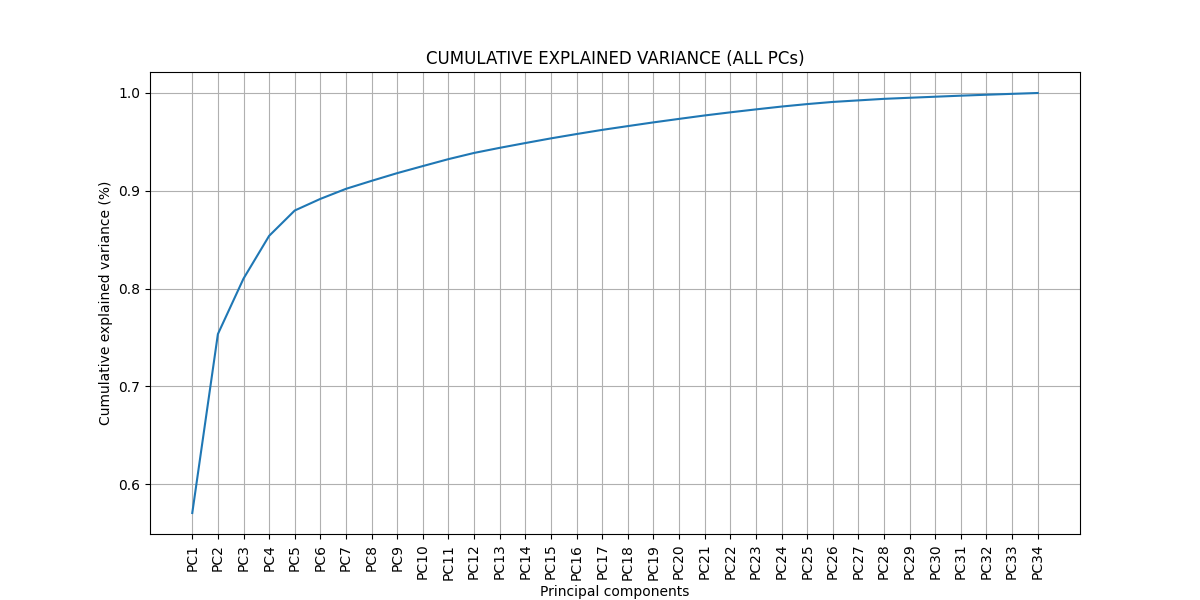

In [ ]:
# INITIALIZE THE PCA
pca_full = PCA()  # <-- TODO!!

# FIT THE PCA
pca_full.fit(Xfifa)  # <-- TODO!!

# MAKE THE CUMULATIVE EXPLAINED VARIANCE PLOT
plt.figure(figsize=(12,6)) #<-- TODO!!
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.title("CUMULATIVE EXPLAINED VARIANCE (ALL PCs)")
plt.xticks(ticks=np.arange(pca_full.n_features_in_), 
           labels=[f"PC{i+1}" for i in range(pca_full.n_features_in_)],
           rotation=90)
plt.xlabel("Principal components")
plt.ylabel("Cumulative explained variance (%)")
plt.grid()
plt.show()

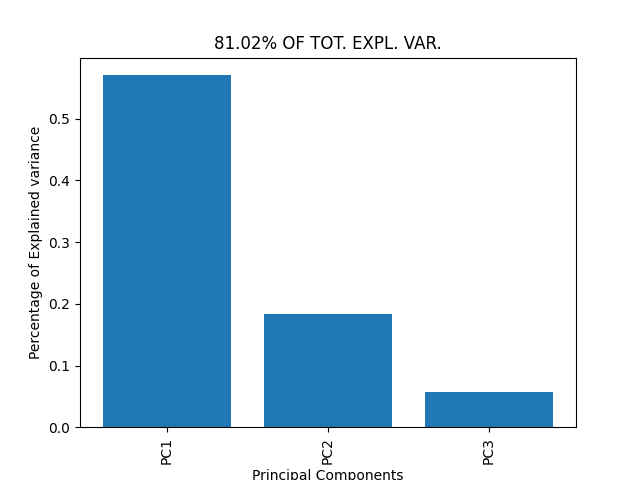

In [60]:
m = 3

# INITIALIZE THE PCA
pca = PCA(n_components=m)  # <-- TODO!!

# FIT THE PCA
pca.fit(Xfifa)  # <-- TODO!!

# COMPUTE THE PERCENTAGE OF TOT. EXPL. VARIANCE (ROUNDED TO 2 DECIMALS)
round_expl_var_ratio = np.round(pca.explained_variance_ratio_.sum()*100,decimals=2)  # <-- TODO!!

# MAKE THE BARPLOT
plt.figure() #<-- TODO!!
plt.bar(range(1,m+1), pca.explained_variance_ratio_)
plt.title(f"{round_expl_var_ratio}% OF TOT. EXPL. VAR.")
plt.xticks(ticks=np.arange(1,m+1), 
           labels=[f"PC{i}" for i in range(1,m+1)],
           rotation=90)
plt.xlabel("Principal Components")
plt.ylabel("Percentage of Explained variance")
plt.show()

### Interpretation of the PCs

Now, looking at the contributes of the original features to the PCs, try to give an interpretation to the vectors of the new basis.

**EXERCISE:** completing the code in the first cell, for each PC, print two barplots representing the vector; the first barplot using the colors of the *skill types*, the second barplot using the colors of the *skill categories*. Moreover, for each PC, print the name of the skills with greatest contribute w.r.t. to the threshold $\epsilon = \sqrt{1/n}$ ($n$ is the number of skills). 

**EXERCISE:** int the second one of the two following cells, write the names that you have decided to assign to the three PCs, respectively. Fill in also the next (text) cell with the chosen names/interpretations

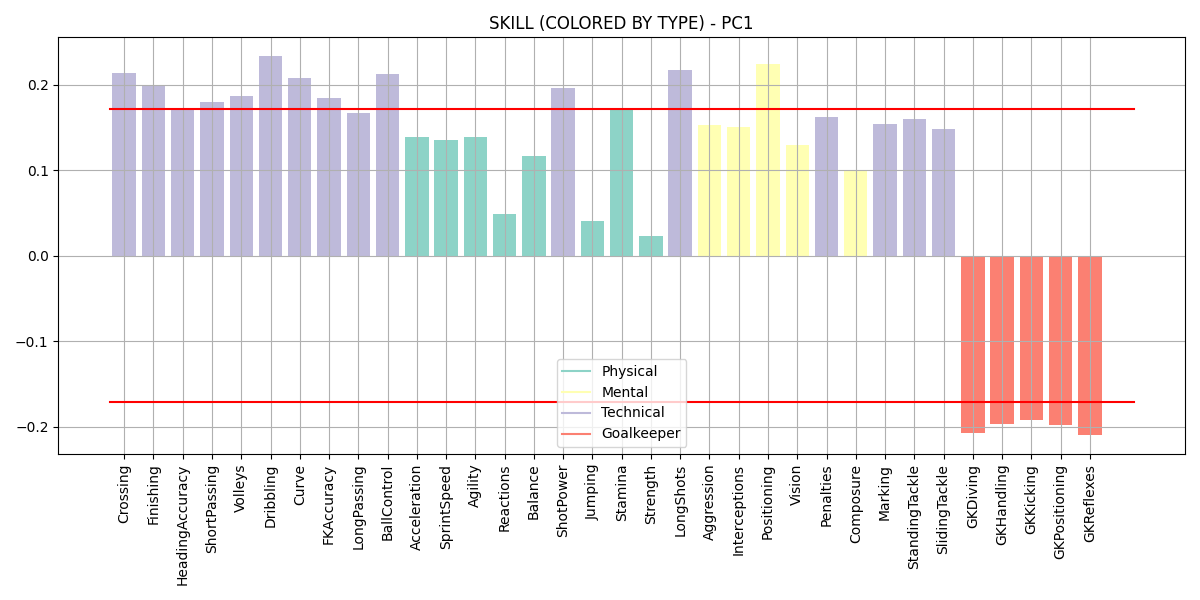

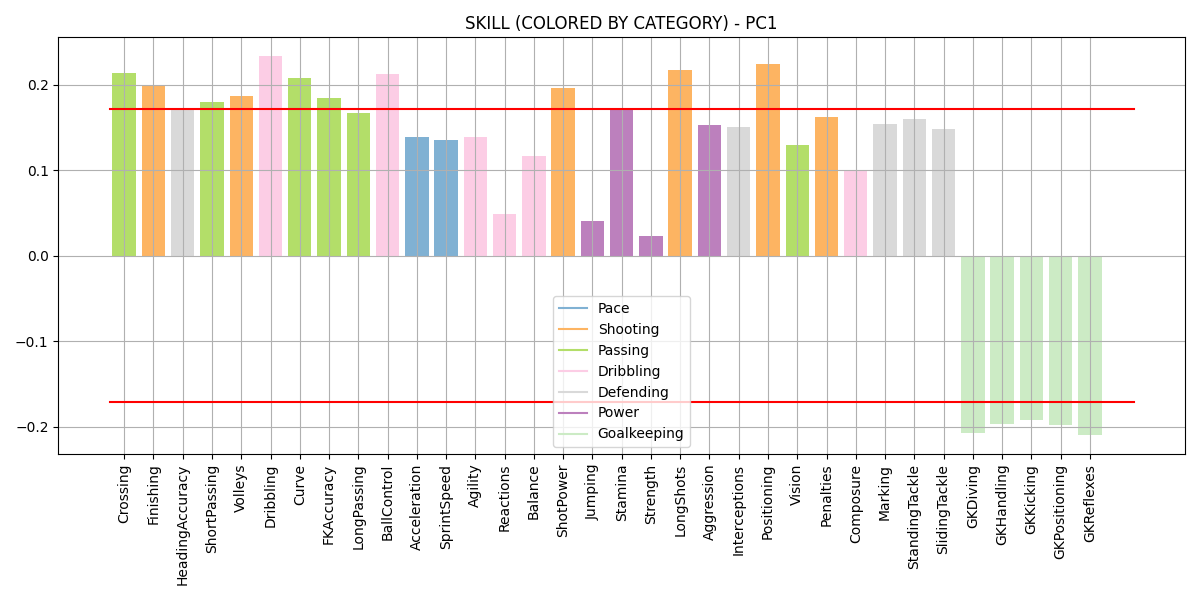

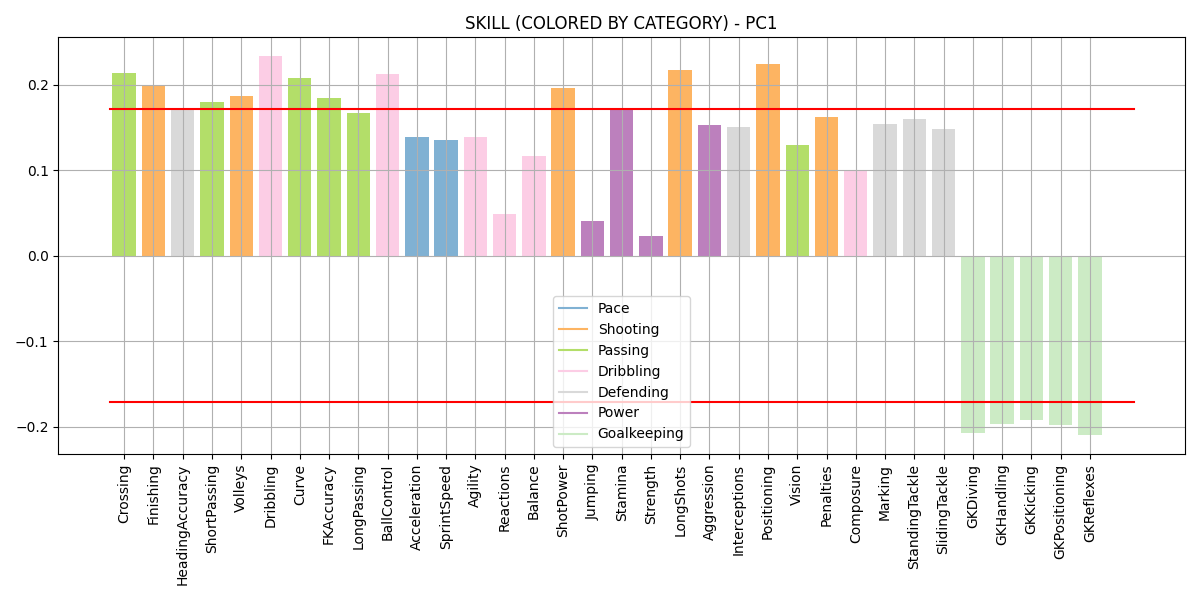


****************** PC1 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Crossing', 'Finishing', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'BallControl', 'ShotPower', 'Stamina', 'LongShots', 'Positioning']

HIGH-VALUED NEGATIVE COMPONENTS: ['HeadingAccuracy', 'LongPassing', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'Jumping', 'Strength', 'Aggression', 'Interceptions', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
*********************************************



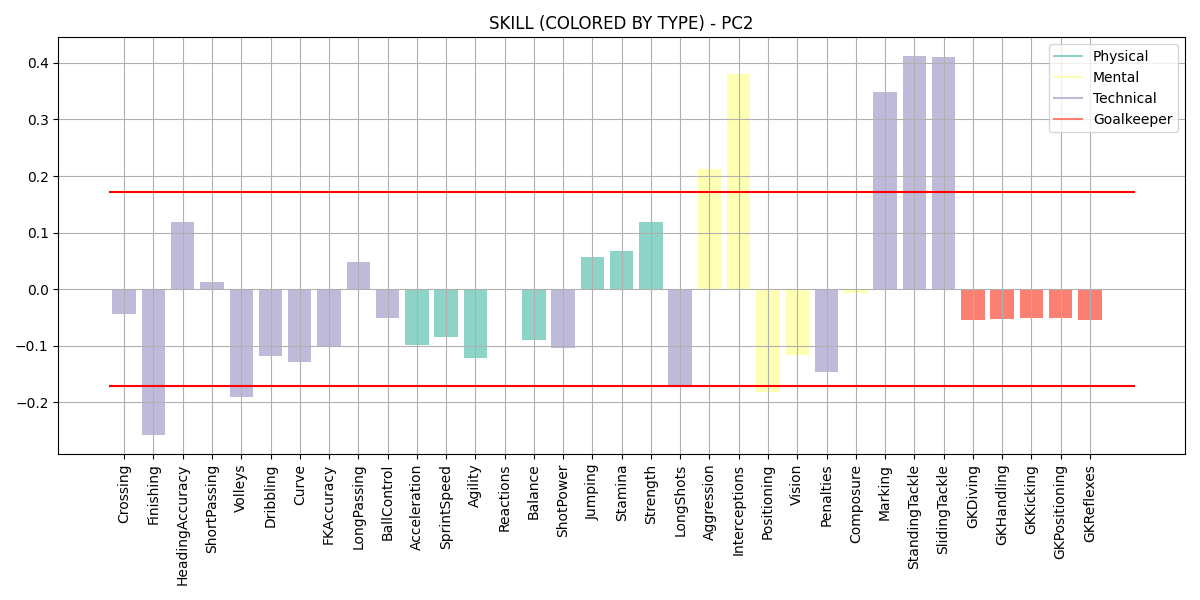

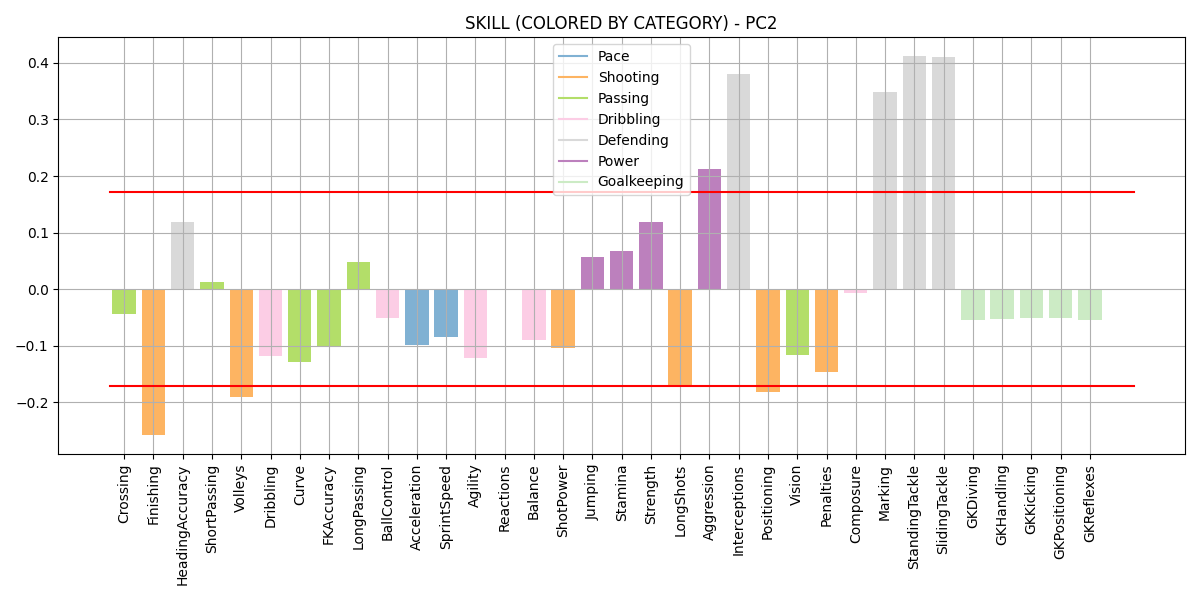

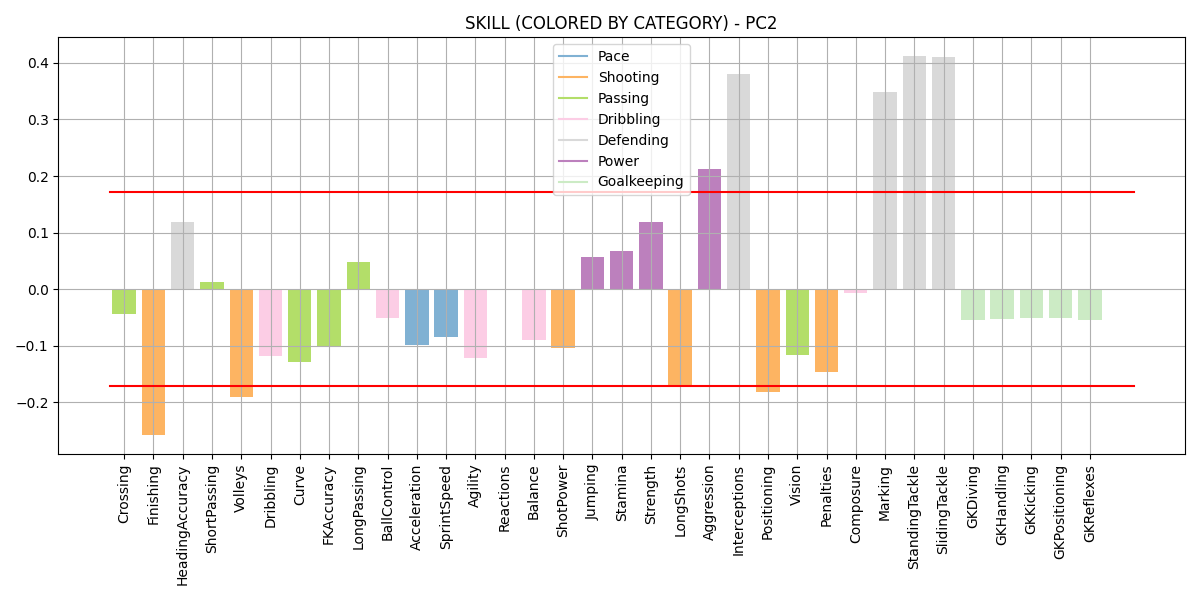


****************** PC2 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Aggression', 'Interceptions', 'Marking', 'StandingTackle', 'SlidingTackle']

HIGH-VALUED NEGATIVE COMPONENTS: ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Positioning', 'Vision', 'Penalties', 'Composure', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
*********************************************



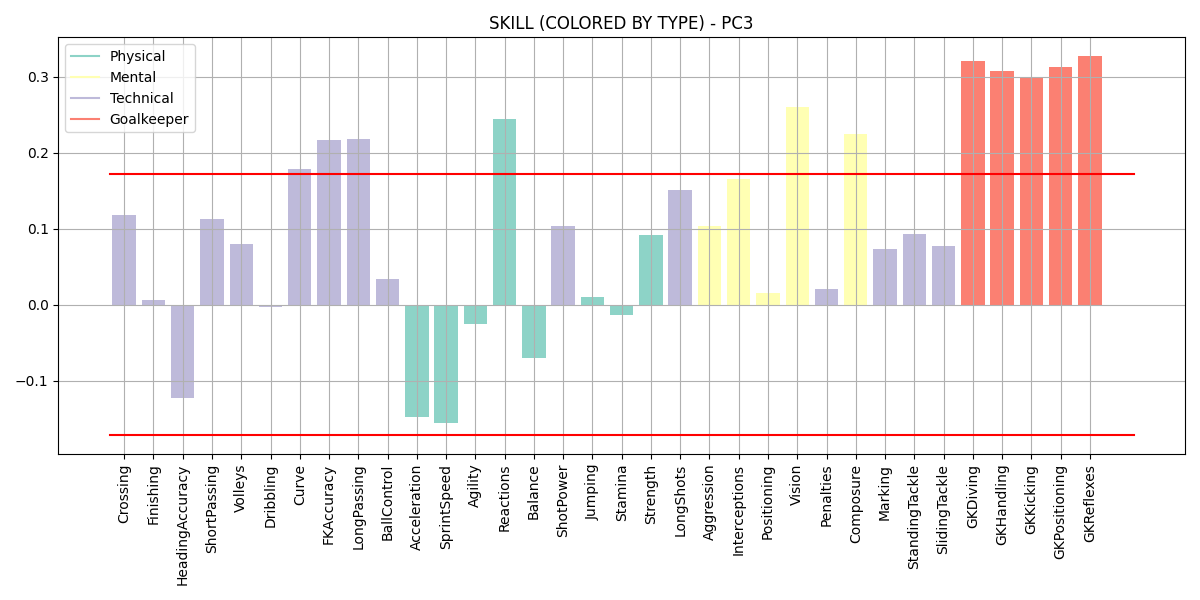

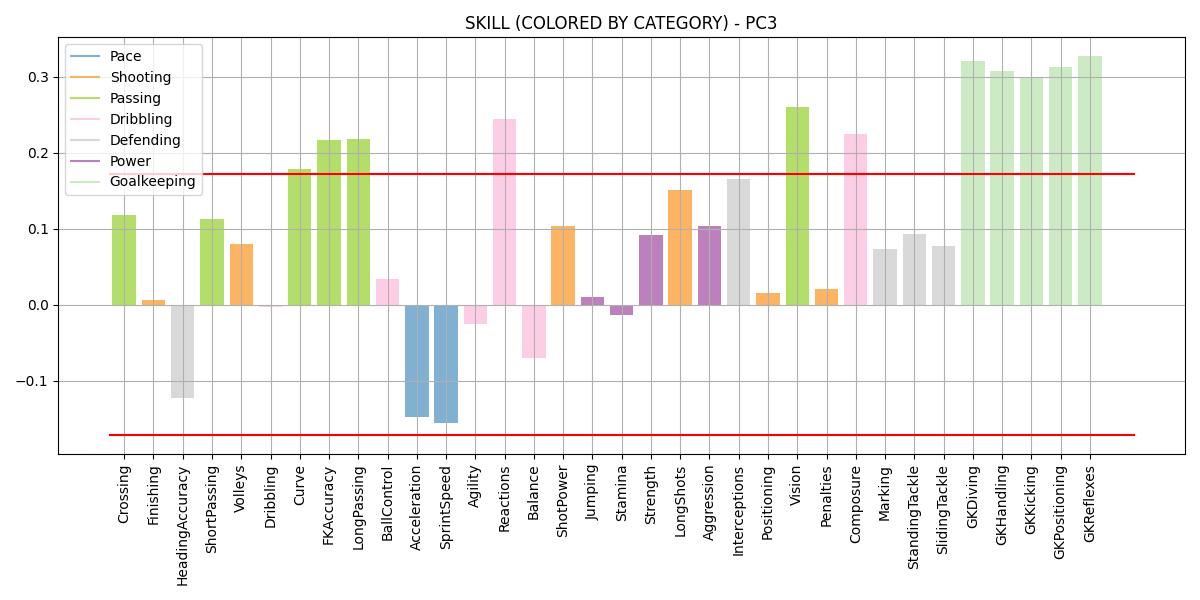

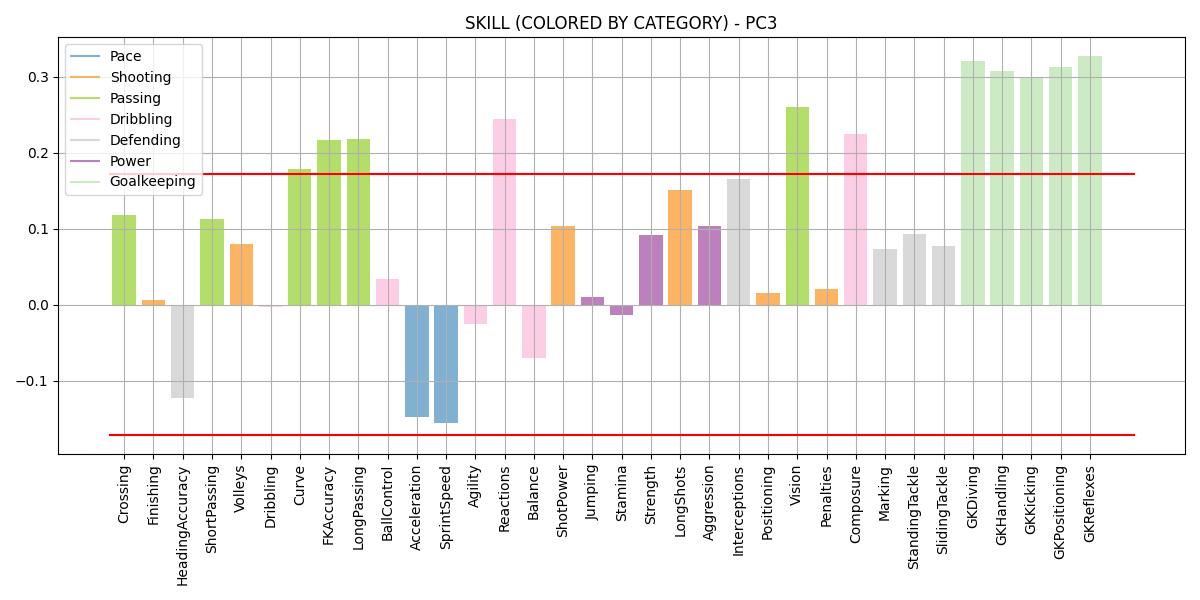


****************** PC3 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Curve', 'FKAccuracy', 'LongPassing', 'Reactions', 'Vision', 'Composure', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

HIGH-VALUED NEGATIVE COMPONENTS: ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Penalties', 'Marking', 'StandingTackle', 'SlidingTackle']
*********************************************



In [76]:
# DEFINE EPSILON
eps = np.sqrt(1/pca.n_features_in_)  # <-- TODO!!

# DEFINE THE LIST OF SKILL COLORS W.R.T. THE SKILL TYPES AND THE SKILL CATEGORIES
skill_colors_type = [skill_types_df.loc[skill_types_df["skill"]== s]["color"].values[0] for s in skill_cols]  # <-- TODO!!
skill_colors_cat =  [skill_cats_df.loc[skill_cats_df["skill"]== s]["color"].values[0] for s in skill_cols]  # <-- TODO!!

# MAKE A CUSTOM LEGEND
type_colors_legend = [Line2D([0], [0], color=type_colors[k]) for k in type_colors.keys()]
cat_colors_legend = [Line2D([0], [0], color=cat_colors[k]) for k in cat_colors.keys()]

# FOR-CYCLE TO GENERALIZE THE PLOT COMMANDS
for ii in range(m):
    # MAKE THE BARPLOT WITH SKILL TYPE COLORS
    plt.figure(figsize=(12,6))  #<-- TODO!!
    plt.bar(np.arange(pca.n_features_in_), pca.components_[ii,:], color=skill_colors_type)
    plt.plot([-0.5, pca.n_features_in_+0.5], [eps, eps], "red")
    plt.plot([-0.5, pca.n_features_in_+0.5], [-eps, -eps], "red")
    plt.xticks(ticks=np.arange(pca.n_features_in_),
               labels=skill_cols,
               rotation=90)
    plt.title(f"SKILL (COLORED BY TYPE) - PC{ii+1}")
    plt.legend(type_colors_legend, [k for k in type_colors.keys()])
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # MAKE THE BARPLOT WITH SKILL CATEGORY COLORS
    plt.figure(figsize=(12, 6))
    plt.bar(np.arange(pca.n_features_in_), pca.components_[ii,:], color=skill_colors_cat)
    plt.plot([-0.5, pca.n_features_in_+0.5], [eps, eps], "red")
    plt.plot([-0.5, pca.n_features_in_+0.5], [-eps, -eps], "red")
    plt.xticks(ticks=np.arange(pca.n_features_in_),
               labels=skill_cols,
               rotation=90)
    plt.title(f"SKILL (COLORED BY CATEGORY) - PC{ii+1}")
    plt.legend(cat_colors_legend, [k for k in cat_colors.keys()])
    plt.grid()
    plt.tight_layout()
    plt.show() #<-- TODO!!
    plt.show()
    
    # THE SELECTION OF THE SKILLS WITH CONTRIBUTE GREATER THAN THE THRESHOLD
    ind_great_pos_PCii= np.argwhere(pca.components_[ii,:]>=eps).flatten() #<-- TODO!!
    ind_great_neg_PCii= np.argwhere(pca.components_[ii,:]<eps).flatten() #<-- TODO!!
    
    great_pos_PCii= [skill_cols[i] for i in ind_great_pos_PCii]    
    great_neg_PCii= [skill_cols[i] for i in ind_great_neg_PCii]
        
    print('')
    print(f'****************** PC{ii+1} **********************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {great_pos_PCii}')  # <-- TODO!!
    print('')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {great_neg_PCii}')  # <-- TODO!!
    print('*********************************************')
    print('')

In [ ]:
# LIST OF THE NAMES ASSIGNED TO THE THREE PCs
pc_names = ["Field Player (+) vs Goal-Keeper (-)",  # <-- TODO!!
            'Attack (-) vs Defense (+)',  # <-- TODO!!
            'Accuracy  & Reflexes'  # <-- TODO!!
            ]

#### PC's Names
1. **PC1:** Field Player (-) vs Goal-Keeper (+)
2. **PC2:** Attack (-) vs Defense (+)
3. **PC3:** Accuracy  & Reflexes

### Score Graphs

**EXERCISE:** plot two score graphs of the football players, colored w.r.t. their general position using the **Set1 colormap** (*cm.Set1.colors*); if you want, you can add a 'color' column to *myfifa_df* (as we did for the DataFrames of skill types/categories).
In particular:
1. plot the score graph in the PC space (i.e., $\mathbb{R}^3$);
1. plot the score graph w.r.t. the projection on the plane of the first two PCs.


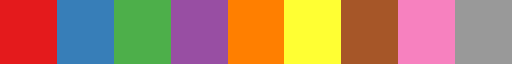


*************************
GENERAL POSITIONS: ['FW', 'MF', 'GK', 'DF']
*************************



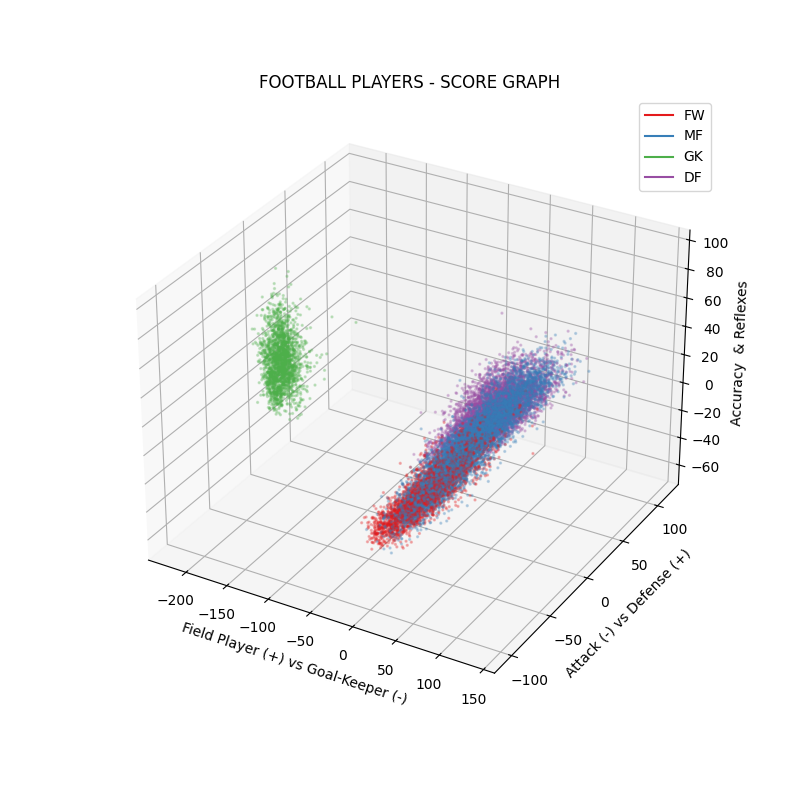

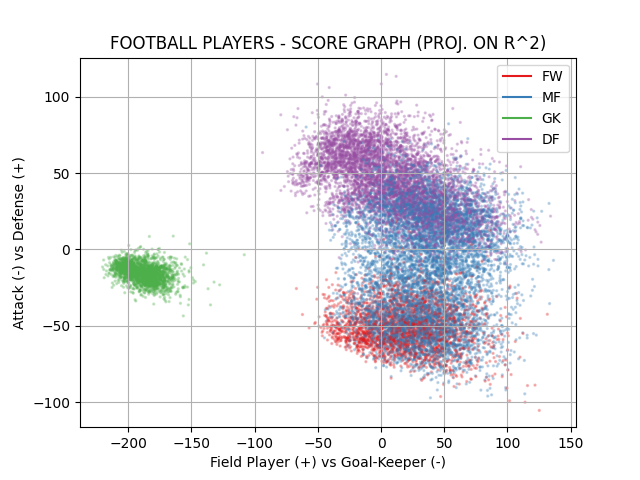

In [93]:
# SAVE THE COLORS OF Set1 AS A LIST OF 3-TUPLES "(red_value, green_value, blue_value)"
set1 = cm.Set1.colors

######### SHOWING THE COLORS OF THE CHOSEN COLORMAP #########
display(cm.Set1)
#############################################################

# EXTRACT THE GENERAL POSITIONS FROM THE DATASET
genpos = myfifa_df['GeneralPosition'].unique()

# VISUALIZE THE GENERAL POSITIONS
print('')
print('*************************')
print(f'GENERAL POSITIONS: {list(genpos)}')
print('*************************')
print('')

# DICTIONARY OF THE TYPE {general_pos: color}
genpos_colors = {genpos[i]:set1[i] for i in range(len(genpos))}  # <-- TODO!!

# ADDING THE 'color' COLUMN
myfifa_df['color'] = [genpos_colors[t] for t in myfifa_df["GeneralPosition"].values]  # <-- TODO!!

# -------------------------------------------------------------

# COMPUTE THE DATA TRANSFORMATION INTO THE PC-SPACE
Yfifa = pca.transform(Xfifa)  # <-- TODO!!

# MAKE A CUSTOM LEGEND FOR COLORS
genpos_colors_legend = [Line2D([0], [0], color=genpos_colors[k]) for k in genpos_colors.keys()]

# MAKE THE 3D SCORE GRAPH
sg_3d = plt.figure(figsize=(8, 8))
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(Yfifa[:,0], Yfifa[:,1], Yfifa[:,2], s=2, c=myfifa_df["color"].values, alpha=0.25)  # <-- TODO!!
plt.title('FOOTBALL PLAYERS - SCORE GRAPH')
ax_sg_3d.set_xlabel(pc_names[0])
ax_sg_3d.set_ylabel(pc_names[1])
ax_sg_3d.set_zlabel(pc_names[2])
plt.legend(genpos_colors_legend, [k for k in genpos_colors.keys()])
plt.grid()
plt.show()

# MAKE THE 2D SCORE GRAPH
plt.figure() # <-- TODO!!
plt.scatter(Yfifa[:,0], Yfifa[:,1], s=2, c=myfifa_df["color"].values, alpha=0.25)
plt.title("FOOTBALL PLAYERS - SCORE GRAPH (PROJ. ON R^2)")
plt.xlabel(pc_names[0])
plt.ylabel(pc_names[1])
plt.legend(genpos_colors_legend, [k for k in genpos_colors.keys()])
plt.grid()
plt.show()

#### Very Interesting Observation:

From a particular point of view, in the 3D score graph, we can observe that the point cloud of the "field palyers" lies, approximately, on a plane. Then, it could be very interesting to **repeat the PCA on two separated datasets: the Goal-Keepers' dataset and the Field-Players' dataset**.

**OPTIONAL EXERCISE:** create a new notebook where you perform these analyses on separated datasets.

### Analyses of the quality of the PC-Based Representation and Interpretation (External Evaluation Preview)

If we interpreted correctly the PCs, the "best" players, according to their general positions, are characterized by:
- **Best Goal-Keepers:** I expect high positive values of PC1 (G.K. Player), high positive values of PC3 (Acc. & Ref.);
- **Best Defenders:** I expect high negative values of PC1 (Field Player), high positive value of PC2 (Defense), and high positive values of PC3 (Acc. & Ref.);
- **Best Mid-Fielders:** I expect high negative values of PC1 (Field Player), and high positive values of PC3 (Acc. & Ref.);
- **Best Forwards:** I expect high negative values of PC1 (Field Player), high negative value of PC2 (Attack), and high positive values of PC3 (Acc. & Ref.).

Then, plotting the score graph with colors according to the "Overall" score of the players, the best players should follow this observations.

**Remember:** the authors of FIFA '19, compute the overall score of a player as a weighted mean of the most important skills associated to the palyer's general position.

**EXERCISE:** plot another score graph in $\mathbb{R}^3$ where the color describes the overall score of the players.

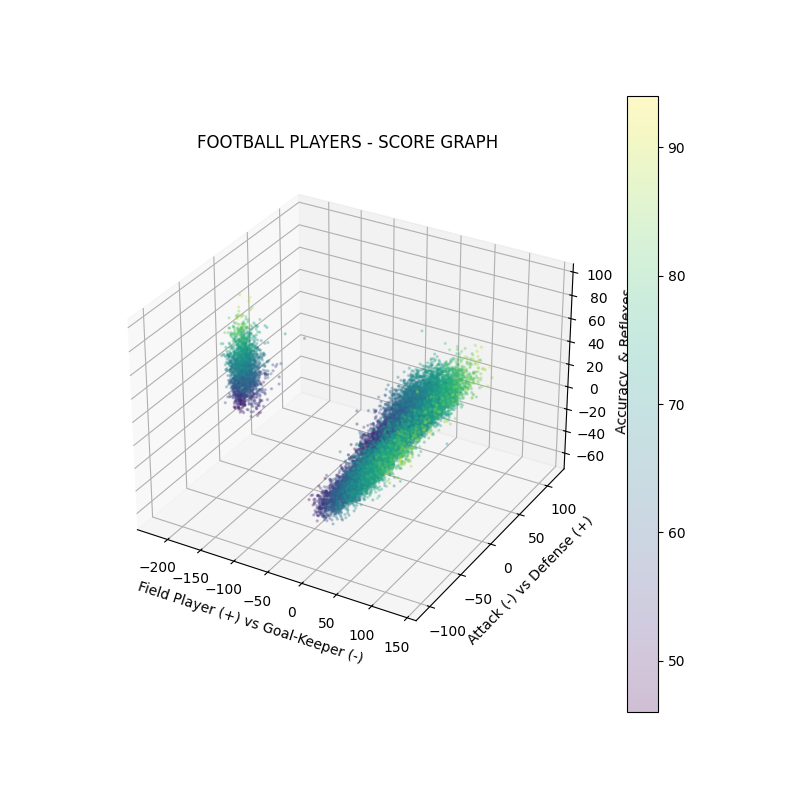

In [98]:
# MAKE THE 3D SCORE GRAPH
sg_overall = plt.figure(figsize=(8,8)) #<-- TODO!!
ax_sg_overall= sg_overall.add_subplot(111, projection="3d")
ovrll_sc= ax_sg_overall.scatter(Yfifa[:,0], Yfifa[:,1], Yfifa[:,2], s=2, c=myfifa_df["Overall"].values, alpha=0.25)
plt.title("FOOTBALL PLAYERS - SCORE GRAPH")
ax_sg_overall.set_xlabel(pc_names[0])
ax_sg_overall.set_ylabel(pc_names[1])
ax_sg_overall.set_zlabel(pc_names[2])
plt.colorbar(ovrll_sc)
plt.grid()
plt.show()

## $k$-Means

Now, let's make a cluster analysis of the football players in the PC-space.

**EXERCISE:** Run the $k$-Means algorithm finding the optimal number of clusters, between $3$ and $10$, according to the silhouette coefficient. Then
1. Plot the centroids in the PC-space (if possible, with also the football palyers);
2. Plot as barplots the centroids and try to give them an interpretation, according to the PC names. Fill in the cells with the names you choose.

**N.B.:** tailored *grid-search* tools of scikit-learn can be used in this case, but it is not purpose of this course to talk about them. Then, a simple *for-cycle* is adopted to find the best clustering w.r.t. the silhouette coefficient.

In [101]:
# SET THE RANDOM STATE (THE LABORATORY DAY)
random_state = 20211220

# INITIALIZE SOME LISTS TO STORE THE TEMPORARY RESULTS AND, THEN, MAKE COMPARISONS
km_list = []
silcoeff_list = []
k_list = list(range(3, 11))

# START THE FOR-CYCLE TO RUN THE k-MEANS AND MEASURING THE SILHOUETTE COEFFICIENT
for i in range(len(k_list)):
    print(f'****************** START k-MEANS WITH k={k_list[i]} ******************')
    print('Computing...')
    km_list.append(KMeans(n_clusters=k_list[i], n_init=3, random_state=random_state))  # <-- TODO!!
    km = km_list[i]
    km.fit(Yfifa) # <-- TODO!!
    silcoeff_list.append(silhouette_score(Yfifa, km.labels_))  # <-- TODO!!
    print(f'****************** END k-MEANS WITH k={k_list[i]} ******************')
    print('')

# FIND THE BEST VALUE OF k AND THE BEST KMeans OBJECT
i_best = np.argmax(silcoeff_list)  # <-- TODO!!
k = k_list[i_best]
km = km_list[i_best]

# VISUALIZE THE RESULT
print('')
print('')
print('****************** RESULTS OF THE SEARCH... ******************')
print(f'BEST SILHOUETTE SCORE: {np.max(silcoeff_list)} --> k = {k}')  # <-- TODO!!
print('**************************************************************')

****************** START k-MEANS WITH k=3 ******************
Computing...
****************** END k-MEANS WITH k=3 ******************

****************** START k-MEANS WITH k=4 ******************
Computing...
****************** END k-MEANS WITH k=4 ******************

****************** START k-MEANS WITH k=5 ******************
Computing...
****************** END k-MEANS WITH k=5 ******************

****************** START k-MEANS WITH k=6 ******************
Computing...
****************** END k-MEANS WITH k=6 ******************

****************** START k-MEANS WITH k=7 ******************
Computing...
****************** END k-MEANS WITH k=7 ******************

****************** START k-MEANS WITH k=8 ******************
Computing...
****************** END k-MEANS WITH k=8 ******************

****************** START k-MEANS WITH k=9 ******************
Computing...
****************** END k-MEANS WITH k=9 ******************

****************** START k-MEANS WITH k=10 ******************


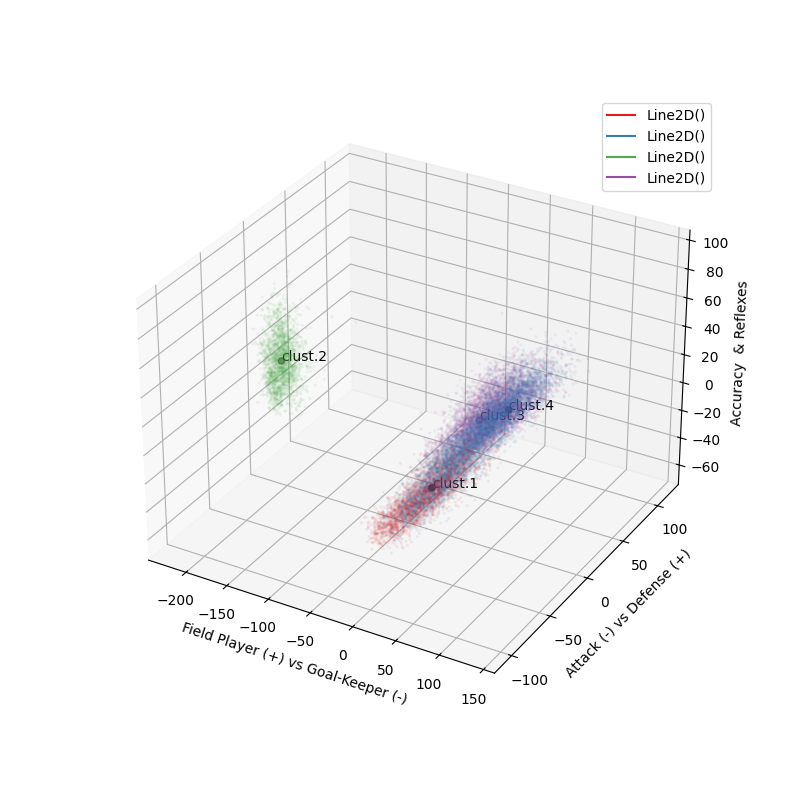

In [109]:
# MAKE THE 3D SCORE GRAPH WITH THE CENTROIDS
sg_3d_km= plt.figure(figsize=(8,8)) #<-- TODO!!
ax_sg_3d_km = sg_3d_km.add_subplot(111, projection="3d")
ax_sg_3d_km.scatter(Yfifa[:,0],Yfifa[:,1],Yfifa[:,2], s=2, c=myfifa_df["color"].values, alpha=0.05)
ax_sg_3d_km.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],c="black")

# CODE FOR WRITING CLUSTERS' INDICES IN THE PLOT
for kk in range(k):
    ax_sg_3d_km.text(km.cluster_centers_[kk, 0], km.cluster_centers_[kk, 1], km.cluster_centers_[kk, 2], f'clust.{kk + 1}')
ax_sg_3d_km.set_xlabel(pc_names[0])#<-- TODO!!
ax_sg_3d_km.set_ylabel(pc_names[1])
ax_sg_3d_km.set_zlabel(pc_names[2])
plt.legend(genpos_colors_legend, [k for k in genpos_colors_legend])
plt.grid()
plt.show()

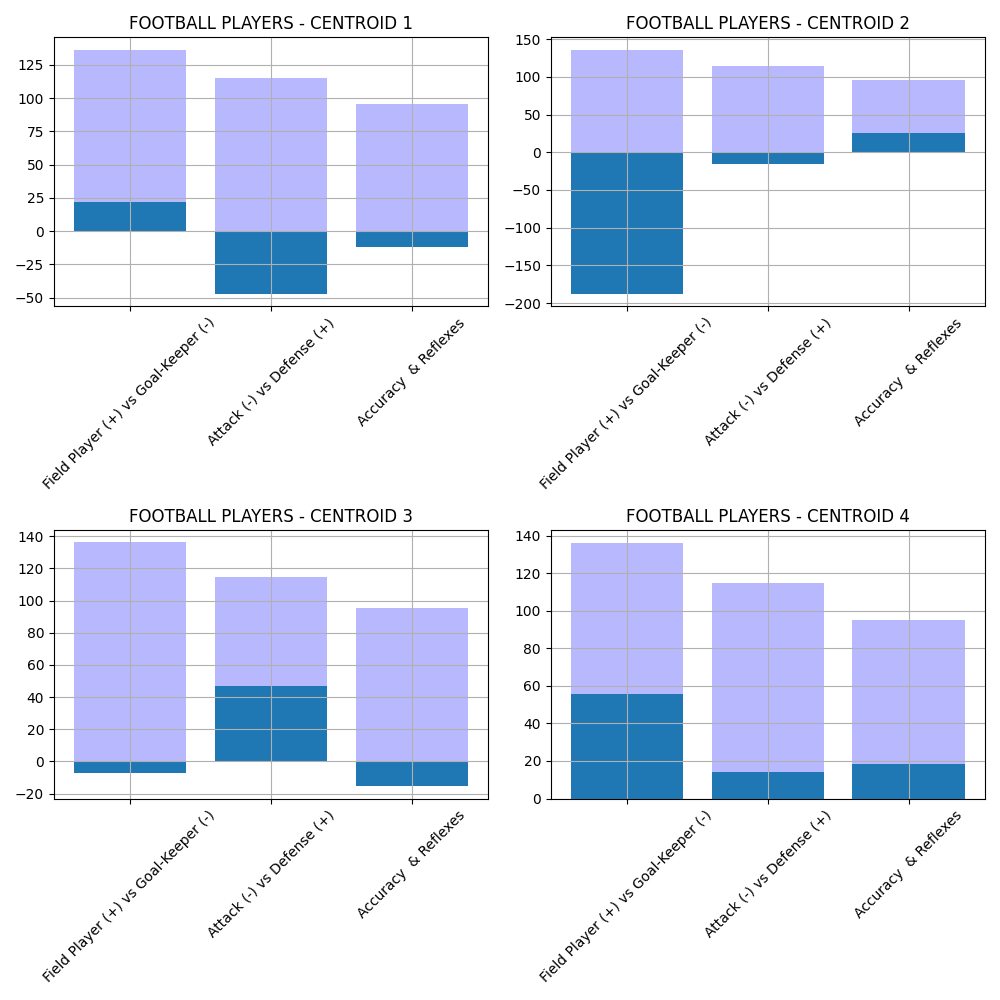

In [114]:
# COMPUTE THE MAX/MIN VALUES IN THE PC-SPACE
maxs_y = Yfifa.max(axis=0)  # <-- TODO!!
mins_y = Yfifa.min(axis=0)  # <-- TODO!! 

# MAKE THE BARPLOTS OF THE CENTROIDS
fig_centroids, ax_centroids = plt.subplots(2, 2, figsize=(10, 10))
for ii in range(k):
    ir= ii//2 # ... <-- TODO!!
    ic= ii%2
    ax_centroids[ir,ic].bar(np.arange(km.cluster_centers_.shape[1]), maxs_y, color="blue", alpha=0.15)
    ax_centroids[ir,ic].bar(np.arange(km.cluster_centers_.shape[1]), maxs_y, color="blue", alpha=0.15)
    ax_centroids[ir,ic].bar(np.arange(km.cluster_centers_.shape[1]), km.cluster_centers_[ii,:])
    ax_centroids[ir,ic].set_xticks(ticks=np.arange(km.cluster_centers_.shape[1]))
    ax_centroids[ir,ic].set_xticklabels(labels=pc_names, rotation=45)
    ax_centroids[ir,ic].grid(visible=True, which= "both")
    plt.tight_layout()
    ax_centroids[ir,ic].set_title(f"FOOTBALL PLAYERS - CENTROID {ii+1}")

### Interpretation of the Centroids

Looking at the PC values of the centroids in the barplots above, we clearly understand that:
1. **Centroid 1:** is a cluster of of goal-keepers (GK);
1. **Centroid 2:** is a cluster of forword(FW) players or players highly focused on attack;
1. **Centroid 3:** is a cluster of defenders (DF) or players highly focused on defense;
1. **Centroid 4:** is a cluster of "true" field players, partially good also in defense.

In [119]:
# LIST OF THE NAMES ASSIGNED TO THE FOUR CLUSTERS
cluster_names =  ['Goal-Keepers', 
                  'Forward Players',
                  'Backward Players',
                  'Midfield Players'
                  ]

### Evaluation of the Clustering Results

Observing at the score graph with centroids and the centroids' barplots, we can do a fast *External evaluation* without quantifying exactly the percentages of general positions in each cluster. Indeed, we clearly see that the clusters characterize very well the goal-keepers, the defenders and the forwards; only the mid-fielders are scattered between the clusters of centroid 2, 3, and 4. Nonetheless, this fact is coherent with the great variety of mid-fielder types, since some of them are better in attack while other are better in defense and/or the in the center of the field.

#### External Evaluation

Let's perform a more precise external evaluation, looking at the distribution of the labels (i.e., the players' general position) in the four clusters.

**EXERCISE:** show with plots how the general positions are distributed among the clusters and comment the results. E.g., answer to these questions: 
1. "Is the interpratation of the centroids coherent with the general position distribution among them?";
2. "Do you notice any clustering that coincides with a general position?"

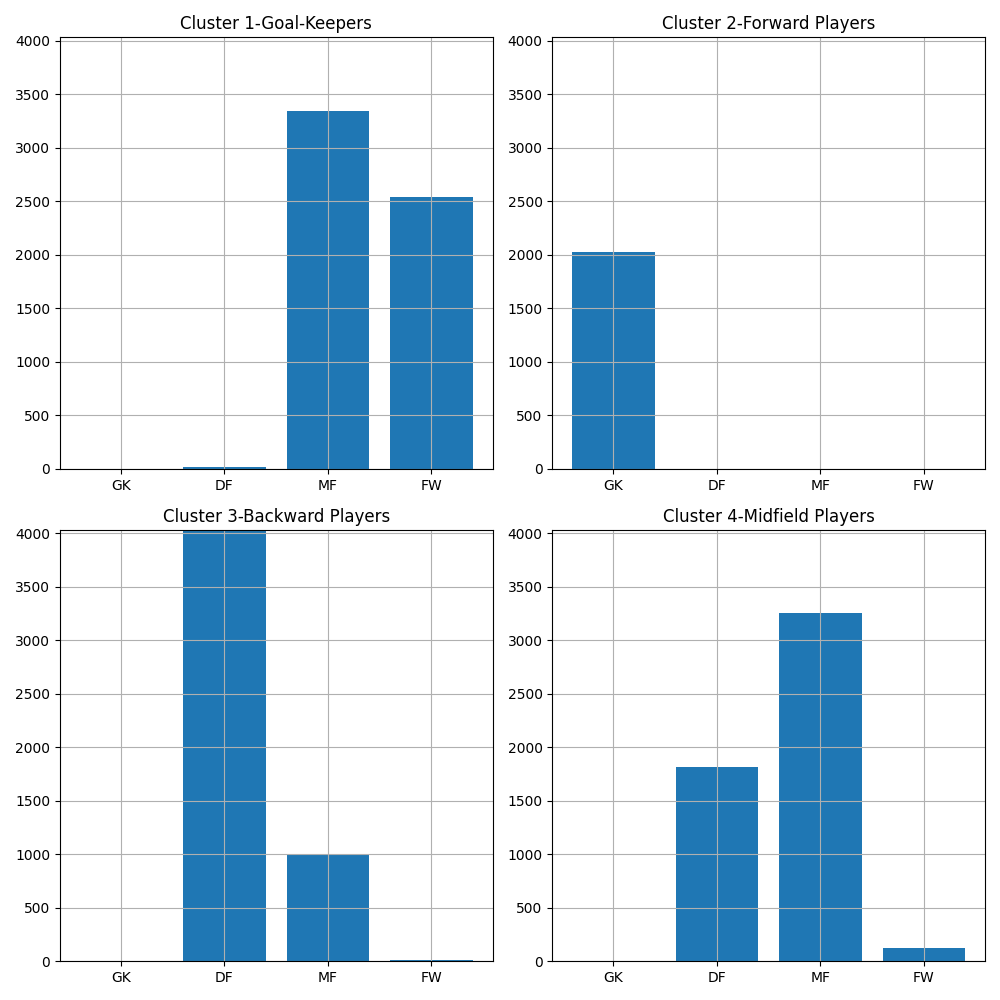

In [120]:
mask_clusters = [km.labels_ == ii for ii in range(k)]# TODO: Write the full code!
cluster_genpos = [dict(myfifa_df.loc[mask_clusters[ii], "GeneralPosition"].value_counts()) for ii in range(k)]

bin_labels = ["GK", "DF", "MF", "FW"]
maxcount= np.max([max(cluster_genpos[kk].values()) for kk in range(k)])


fig_centroids_ext, ax_centroids_ext = plt.subplots(2,2,figsize=(10,10))
for ii in range(k):
    ir=ii//2
    ic=ii%2
    ax_centroids_ext[ir,ic].bar(bin_labels, [cluster_genpos[ii].get(bb,0) for bb in bin_labels])
    ax_centroids_ext[ir,ic].set_ylim(0, maxcount)
    ax_centroids_ext[ir,ic].grid(visible=True, which= "both")
    plt.tight_layout()
    ax_centroids_ext[ir,ic].set_title(f"Cluster {ii+1}-{cluster_names[ii]}")

#### Internal Evaluation

**EXERCISE:** Compute the silohette score of each cluster and comment the results, considering also the average silohette score of the clustering yo applied and the external evaluation results. **ATTENTION:** it is suggested to use the *silohette_samples* function of scikit learn for this exercise.

**EXTRA EXERCISE:** Try to plot the silohette score barplot as we saw in the slides.

In [122]:
silcores= silhouette_samples(Yfifa, km.labels_)# TODO: Write the full code!
cluster_silscores = [np.mean(silcores[km.labels_ == kk]) for kk in range(k)]

display(pd.DataFrame(np.array(cluster_silscores+[np.max(silcoeff_list)]), index= cluster_names + ["Global"], columns=["Sil.Score"]))

,Sil.Score
Goal-Keepers,0.424122
Forward Players,0.849580
Backward Players,0.445118
Midfield Players,0.392739
Global,0.468442
